# First step : let us understand our data 

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import re

In [2]:
from preprocess import preprocess_text

In [3]:
# 1. Load the reviews
DATASET_DIR = r'C:\Users\nourh\Documents\cours 3A ensae\NLP\NLP_course\Mini_project\Data\aclImdb_v1\aclImdb'

def load_reviews(data_dir, dataset_type='train'):
    reviews = []
    sentiments = []
    base_path = os.path.join(data_dir, dataset_type)
    
    for sentiment in ['pos', 'neg']:
        sentiment_path = os.path.join(base_path, sentiment)
        for filename in os.listdir(sentiment_path):
            if filename.endswith('.txt'):
                with open(os.path.join(sentiment_path, filename), 'r', encoding='utf-8') as f:
                    reviews.append(f.read())
                    sentiments.append(sentiment)
    return pd.DataFrame({'review': reviews, 'sentiment': sentiments})


In [4]:
# 2. Load train and test, then merge
train_df = load_reviews(DATASET_DIR, 'train')
test_df = load_reviews(DATASET_DIR, 'test')
df = pd.concat([train_df, test_df], ignore_index=True)

print(f"Dataset shape: {df.shape}")
print(df.head())

Dataset shape: (50000, 2)
                                              review sentiment
0  Bromwell High is a cartoon comedy. It ran at t...       pos
1  Homelessness (or Houselessness as George Carli...       pos
2  Brilliant over-acting by Lesley Ann Warren. Be...       pos
3  This is easily the most underrated film inn th...       pos
4  This is not the typical Mel Brooks film. It wa...       pos


In [5]:
df['review'] = df['review'].apply(lambda x: preprocess_text(x, remove_stopwords=True))

In [6]:
# 3. Add review length column
df['review_length'] = df['review'].apply(lambda x: len(x.split()))

C:\Users\nourh\AppData\Local\Temp\ipykernel_26216\1587852587.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='pastel')


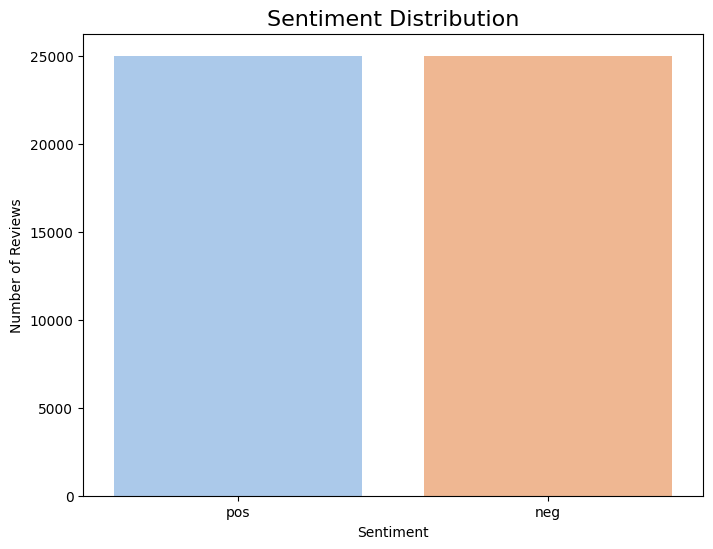

In [7]:
# 4. Descriptive Analysis

# 4.1 Sentiment distribution plot
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='sentiment', palette='pastel')
plt.title('Sentiment Distribution', fontsize=16)
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

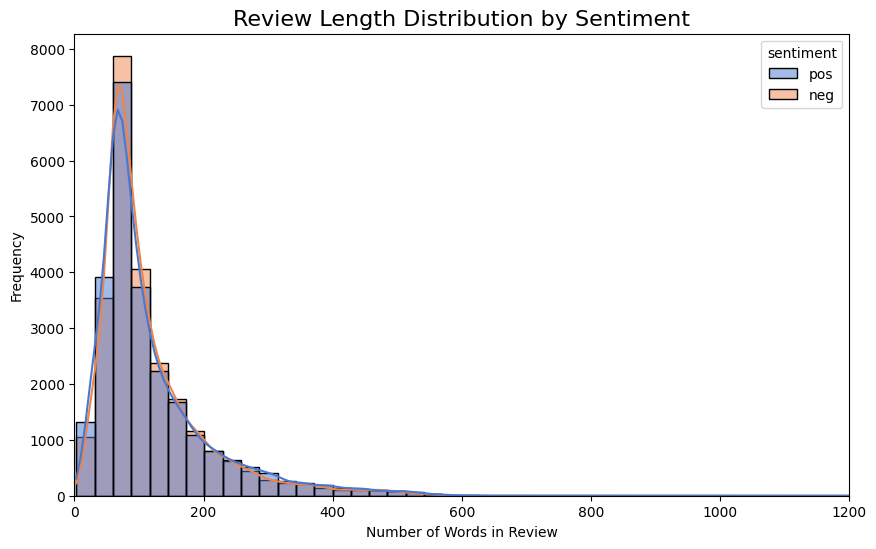

In [8]:
# 4.2 Review length distribution
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='review_length', hue='sentiment', bins=50, kde=True, palette='muted')
plt.title('Review Length Distribution by Sentiment', fontsize=16)
plt.xlabel('Number of Words in Review')
plt.ylabel('Frequency')
plt.xlim(0, 1200)
plt.show()

C:\Users\nourh\AppData\Local\Temp\ipykernel_26216\1241611530.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='sentiment', y='review_length', palette='coolwarm')


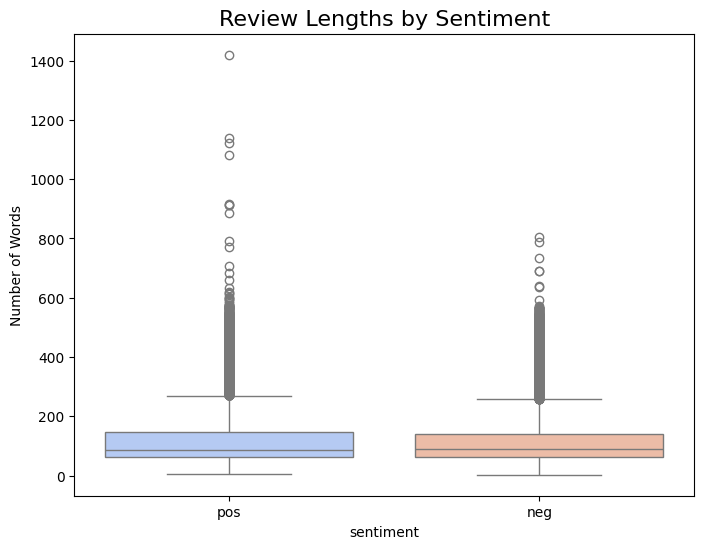

In [9]:
# 4.3 Boxplot of review lengths
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='sentiment', y='review_length', palette='coolwarm')
plt.title('Review Lengths by Sentiment', fontsize=16)
plt.ylabel('Number of Words')
plt.show()

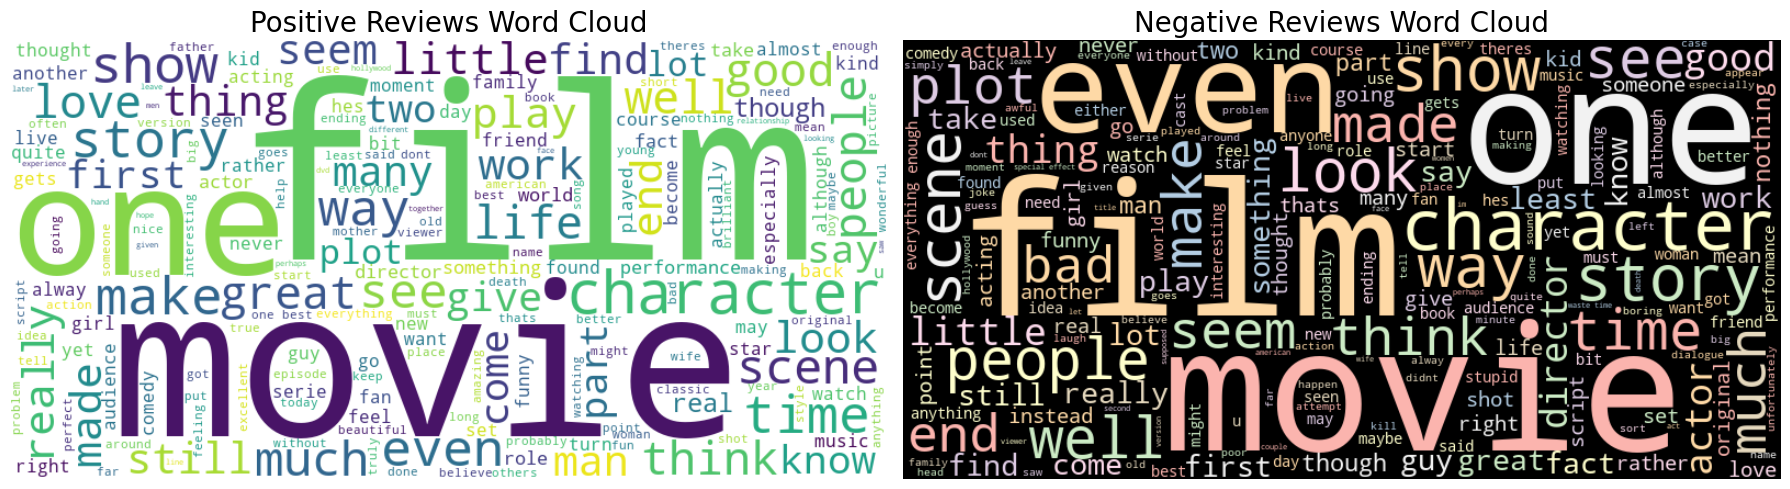

In [10]:
# 5. WordClouds

# Generate text
pos_text = ' '.join(df[df['sentiment'] == 'pos']['review'])
neg_text = ' '.join(df[df['sentiment'] == 'neg']['review'])

# Create wordclouds
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(pos_text)
wordcloud_neg = WordCloud(width=800, height=400, background_color='black', colormap='Pastel1').generate(neg_text)

# Plot
fig, axs = plt.subplots(1, 2, figsize=(18,8))

axs[0].imshow(wordcloud_pos, interpolation='bilinear')
axs[0].axis('off')
axs[0].set_title('Positive Reviews Word Cloud', fontsize=20)

axs[1].imshow(wordcloud_neg, interpolation='bilinear')
axs[1].axis('off')
axs[1].set_title('Negative Reviews Word Cloud', fontsize=20)

plt.tight_layout()
plt.show()


In [11]:
# 6. Most common words function
def get_most_common_words(texts, n=20):
    words = []
    for text in texts:
        text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-letters
        words.extend(text.lower().split())
    return Counter(words).most_common(n)

# Show most common words
print("\nTop 20 Words in Positive Reviews:")
print(get_most_common_words(df[df['sentiment']=='pos']['review']))

print("\nTop 20 Words in Negative Reviews:")
print(get_most_common_words(df[df['sentiment']=='neg']['review']))



Top 20 Words in Positive Reviews:
[('film', 39437), ('movie', 36043), ('one', 25739), ('like', 17057), ('good', 14352), ('great', 12647), ('story', 12381), ('see', 11869), ('time', 11786), ('well', 10980), ('really', 10676), ('also', 10553), ('would', 10368), ('even', 9365), ('much', 8999), ('first', 8864), ('films', 8457), ('love', 8401), ('people', 8365), ('best', 8302)]

Top 20 Words in Negative Reviews:
[('movie', 47535), ('film', 35077), ('one', 24653), ('like', 21777), ('even', 14920), ('good', 14150), ('bad', 14095), ('would', 13633), ('really', 12224), ('time', 11513), ('see', 10568), ('dont', 10037), ('get', 9998), ('much', 9898), ('story', 9681), ('people', 9121), ('could', 9033), ('make', 8985), ('made', 8395), ('movies', 8357)]


In [12]:
def compute_polarity(pos_counts, neg_counts, min_total_freq=50):
    all_words = set(pos_counts.keys()).union(set(neg_counts.keys()))
    polarity = {}
    for word in all_words:
        pos = pos_counts.get(word, 0)
        neg = neg_counts.get(word, 0)
        total = pos + neg
        if total >= min_total_freq:  # only keep words appearing often enough
            score = (pos - neg) / total
            polarity[word] = score
    return polarity


In [19]:

# Step 1: Count word frequencies in positive and negative reviews
positive_reviews = df[df['sentiment'] == 'pos']['review']
negative_reviews = df[df['sentiment'] == 'neg']['review']

# Create word frequency counters for both positive and negative reviews
pos_counts = Counter(" ".join(positive_reviews).split())
neg_counts = Counter(" ".join(negative_reviews).split())
    

polarity = compute_polarity(pos_counts, neg_counts)

neutral_words = [word for word, score in polarity.items() if abs(score) < 0.2]


In [20]:
neutral_words

['home',
 'brit',
 'suspense',
 'appropriate',
 'blow',
 'oceans',
 'bang',
 'penn',
 'possibilities',
 'viewer',
 'unemployed',
 'link',
 'chasing',
 'sacred',
 'pompous',
 'subjective',
 'manages',
 'disabled',
 'thankfully',
 'walken',
 'halloween',
 'vast',
 'denmark',
 'exploited',
 'self',
 'lunch',
 'answer',
 'sheer',
 'production',
 'officially',
 'filmthis',
 'nods',
 'water',
 'aid',
 'wizard',
 'small',
 'mines',
 'fairly',
 'observing',
 'realized',
 'involving',
 'reckon',
 'psychopath',
 'males',
 'nolte',
 'teenager',
 'pants',
 'rooted',
 'cons',
 'commits',
 'muscular',
 'annie',
 'apart',
 'climax',
 'perpetually',
 'donna',
 'exaggeration',
 'rule',
 'horrific',
 'complains',
 'encounters',
 'blink',
 'miami',
 'signs',
 'believer',
 'everything',
 'farfetched',
 'vanishes',
 'wed',
 'network',
 'dc',
 'contact',
 'reactions',
 'entering',
 'settle',
 'penned',
 'alicia',
 'lengths',
 'like',
 'mans',
 'en',
 'darling',
 'garden',
 'transforms',
 'demonstrate',
 'bu

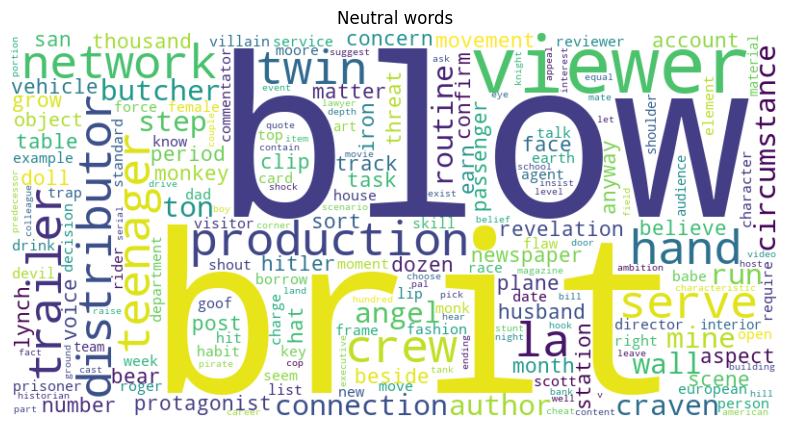

In [21]:
text = " ".join(neutral_words)

# Create the wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Neutral words")
plt.axis('off')
plt.show()

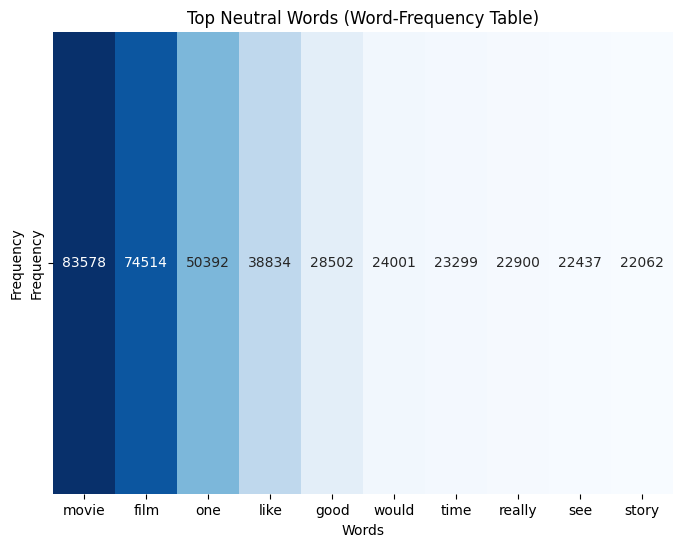

In [22]:
neutral_word_freq = [(word, pos_counts.get(word, 0) + neg_counts.get(word, 0)) for word in neutral_words]

# Sort by frequency
neutral_word_freq = sorted(neutral_word_freq, key=lambda x: x[1], reverse=True)[:10]

# Create DataFrame to display as table
neutral_df = pd.DataFrame(neutral_word_freq, columns=['Word', 'Frequency'])

# Visualize the table using Seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(neutral_df.set_index('Word').T, annot=True, cmap='Blues', cbar=False, fmt='d')
plt.title('Top Neutral Words (Word-Frequency Table)')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

In [23]:
def clean_review(review):
    words = review.lower().split()
    # Remove neutral words from the review
    return ' '.join([word for word in words if word not in neutral_words])

# Apply preprocessing to the entire DataFrame
df['cleaned_review'] = df['review'].apply(clean_review)
    


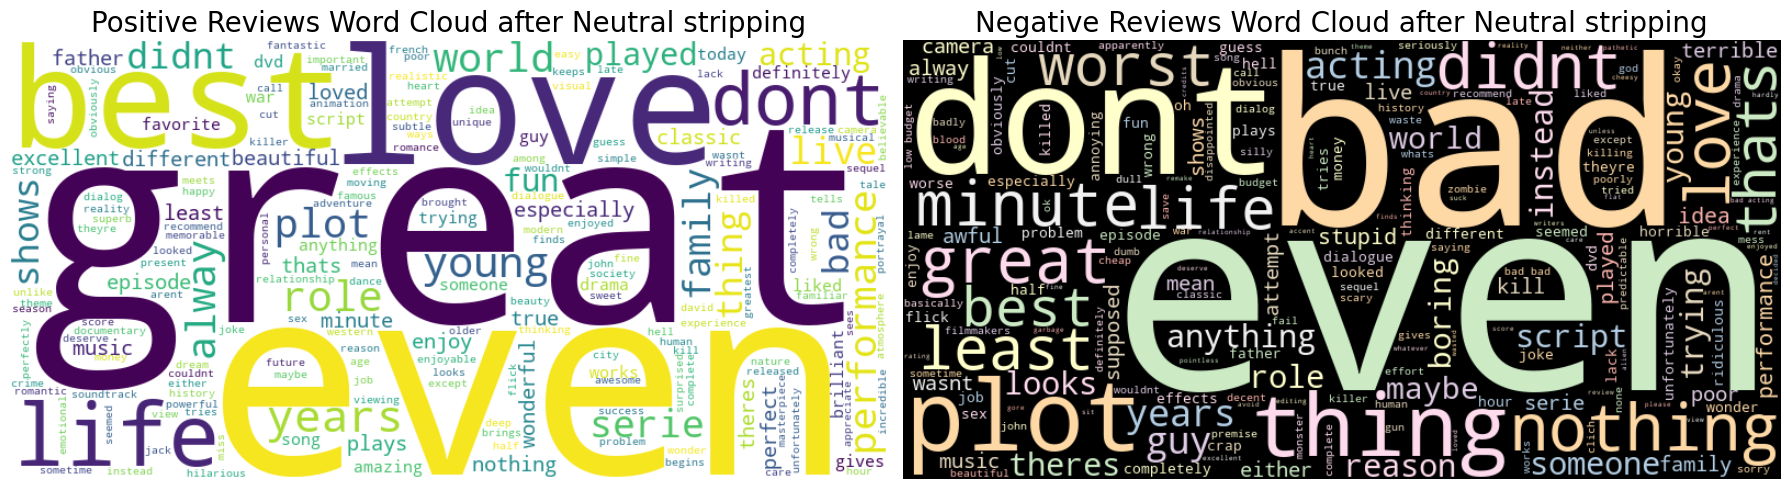

In [24]:
# 5. WordClouds clean

# Generate text
pos_text = ' '.join(df[df['sentiment'] == 'pos']['cleaned_review'])
neg_text = ' '.join(df[df['sentiment'] == 'neg']['cleaned_review'])

# Create wordclouds
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(pos_text)
wordcloud_neg = WordCloud(width=800, height=400, background_color='black', colormap='Pastel1').generate(neg_text)

# Plot
fig, axs = plt.subplots(1, 2, figsize=(18,8))

axs[0].imshow(wordcloud_pos, interpolation='bilinear')
axs[0].axis('off')
axs[0].set_title('Positive Reviews Word Cloud after Neutral stripping', fontsize=20)

axs[1].imshow(wordcloud_neg, interpolation='bilinear')
axs[1].axis('off')
axs[1].set_title('Negative Reviews Word Cloud after Neutral stripping', fontsize=20)

plt.tight_layout()
plt.show()
